In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
#loading dataset

df=pd.read_csv("messy_retail_transactions.csv")
df.head()

,CustomerID,TransactionDate,Amount,ProductCategory,Location,PaymentMethod
0,CUST0177,2023-02-12,1468.92,Clothing,NaN,Debit
1,CUST0359,2022-04-13,421.06,Beauty,NaN,paypal
2,CUST0315,2023-12-25,94.63,Beauty,NaN,Credit Card
3,CUST0422,2023-09-07,865.11,Clothing,Chicago,Debit
4,cust0312,2023-02-15,1224.07,NaN,Chicago,NaN


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   object 
 1   TransactionDate  5000 non-null   object 
 2   Amount           4886 non-null   float64
 3   ProductCategory  3852 non-null   object 
 4   Location         3556 non-null   object 
 5   PaymentMethod    4172 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB


In [161]:
df.describe(include='all')

,CustomerID,TransactionDate,Amount,ProductCategory,Location,PaymentMethod
count,5000,5000,4886.000000,3852,3556,4172
unique,723,878,NaN,7,5,5
top,CUST0353,2022-12-18,NaN,Beauty,los angeles,CRD
freq,18,13,NaN,606,766,854
mean,NaN,NaN,1000.948293,NaN,NaN,NaN
std,NaN,NaN,585.670208,NaN,NaN,NaN
min,NaN,NaN,-9.350000,NaN,NaN,NaN
25%,NaN,NaN,489.752500,NaN,NaN,NaN
50%,NaN,NaN,1008.750000,NaN,NaN,NaN
75%,NaN,NaN,1510.810000,NaN,NaN,NaN


In [162]:
df.duplicated().sum()

0

In [163]:
df.drop_duplicates()

,CustomerID,TransactionDate,Amount,ProductCategory,Location,PaymentMethod
0,CUST0177,2023-02-12,1468.92,Clothing,NaN,Debit
1,CUST0359,2022-04-13,421.06,Beauty,NaN,paypal
2,CUST0315,2023-12-25,94.63,Beauty,NaN,Credit Card
3,CUST0422,2023-09-07,865.11,Clothing,Chicago,Debit
4,cust0312,2023-02-15,1224.07,NaN,Chicago,NaN
...,...,...,...,...,...,...
4995,CUST0072,2022-06-01,1556.72,Home,New York,cash
4996,CUST0436,2023-07-04,620.59,Toys,NaN,Debit
4997,CUST0198,2023-11-28,1042.94,NaN,los angeles,Debit
4998,CUST0088,2023-07-12,873.12,NaN,Phoenix,NaN


In [164]:
df.isnull().sum()

CustomerID            0
TransactionDate       0
Amount              114
ProductCategory    1148
Location           1444
PaymentMethod       828
dtype: int64

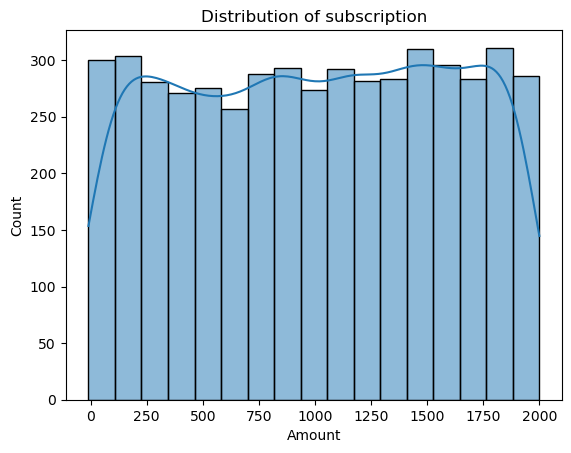

In [165]:
sns.histplot(df['Amount'].dropna(), kde=True)
plt.title('Distribution of subscription')
plt.show()

In [166]:
df = df[df['Amount'].notna()]

In [167]:
df.isnull().sum()

CustomerID            0
TransactionDate       0
Amount                0
ProductCategory    1119
Location           1413
PaymentMethod       808
dtype: int64

In [168]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [169]:
df.rename(columns={'TransactionDate': 'Date'}, inplace=True)


In [170]:
df['Location'].unique()

array([nan, 'Chicago', 'HOUSTON', 'Phoenix', 'los angeles', 'New York'],
      dtype=object)

In [171]:
df['Location'] = df['Location'].replace('HOUSTON', 'Houston')
df['Location'] = df['Location'].replace('los angeles', 'Los Angeles')

In [172]:
df.rename(columns={'ProductCategory': 'Category'}, inplace=True)


In [173]:
df['Category'].unique()

array(['Clothing', 'Beauty', nan, 'Electronics', 'Home', 'Toys',
       'Grocery', 'Books'], dtype=object)

In [174]:
df.rename(columns={'PaymentMethod': 'Payment_Method'}, inplace=True)


In [175]:
df['Payment_Method'].unique()

array(['Debit', 'paypal', 'Credit Card', nan, 'cash', 'CRD'], dtype=object)

In [176]:
df['Payment_Method'] = df['Payment_Method'].replace('CRD', 'Credit Card')
df['Payment_Method'] = df['Payment_Method'].replace('Debit', 'Debit Card')
df['Payment_Method'] = df['Payment_Method'].replace('cash', 'Cash')
df['Payment_Method'] = df['Payment_Method'].replace('paypal', 'PayPal')

In [177]:
df['CustomerID'] = df['CustomerID'].str.replace('(?i)^cust', '', regex=True).astype(int)


In [178]:
df.head()

,CustomerID,Date,Amount,Category,Location,Payment_Method
0,177,2023-02-12,1468.92,Clothing,NaN,Debit Card
1,359,2022-04-13,421.06,Beauty,NaN,PayPal
2,315,2023-12-25,94.63,Beauty,NaN,Credit Card
3,422,2023-09-07,865.11,Clothing,Chicago,Debit Card
4,312,2023-02-15,1224.07,NaN,Chicago,NaN


## RFM


In [179]:
reference_date=df['Date'].max()
reference_date

Timestamp('2024-05-30 00:00:00')

In [180]:
rfm = df.groupby('CustomerID').agg({
    'Date': [
        ('Tenure', lambda x: (x.max() - x.min()).days),
        ('Recency', lambda x: (reference_date - x.max()).days)
    ],
    'CustomerID':  'count',
    'Amount':  'sum',
})


In [ ]:
rfm.rename(columns={'Date':'Recency','count':'Frequency','sum':'Monetary'},inplace=True)
rfm.columns = rfm.columns.droplevel(0)
rfm = rfm.reset_index()

rfm.head()

,CustomerID,Tenure,Recency,Frequency,Monetary
0,1,801,7,6,5041.99
1,2,858,2,17,18223.82
2,3,787,74,15,14604.43
3,4,652,153,11,12075.79
4,5,556,312,9,9188.32


In [182]:
rfm['AOV']=rfm['Monetary']/rfm['Frequency']
rfm.head()

,CustomerID,Tenure,Recency,Frequency,Monetary,AOV
0,1,801,7,6,5041.99,840.331667
1,2,858,2,17,18223.82,1071.989412
2,3,787,74,15,14604.43,973.628667
3,4,652,153,11,12075.79,1097.799091
4,5,556,312,9,9188.32,1020.924444


In [183]:
quantiles= rfm.quantile(q=[0.2,0.4,0.6,0.8])

def Rscore(x,p,d):
    if p=='Recency':
        if x<=d[p][0.2]:
            return 5
        elif x<=d[p][0.4]:
            return 4
        elif x<=d[p][0.6]:
            return 3
        elif x<=d[p][0.8]:
            return 2
        else:
            return 1
        
    else:
        if x<=d[p][0.2]:
            return 1
        elif x<=d[p][0.4]:
            return 2
        elif x<=d[p][0.6]:
            return 3
        elif x<=d[p][0.8]:
            return 4
        else:
            return 5
        
rfm['rfm_recency'] = rfm['Recency'].apply(Rscore, args=('Recency', quantiles,))
rfm['rfm_frequency'] = rfm['Frequency'].apply(Rscore, args=('Frequency', quantiles,))
rfm['rfm_monetary'] = rfm['Monetary'].apply(Rscore, args=('Monetary', quantiles,))

rfm.describe()


,CustomerID,Tenure,Recency,Frequency,Monetary,AOV,rfm_recency,rfm_frequency,rfm_monetary
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,689.988000,92.534000,9.772000,9781.266720,1007.632708,3.018000,2.784000,3.00000
std,144.481833,128.844533,87.265522,3.209457,3603.804176,203.132198,1.421872,1.396153,1.41563
min,1.000000,0.000000,0.000000,1.000000,723.010000,463.653333,1.000000,1.000000,1.00000
25%,125.750000,629.000000,32.000000,8.000000,7136.852500,873.306500,2.000000,2.000000,2.00000
50%,250.500000,720.500000,63.500000,10.000000,9671.900000,1010.203193,3.000000,3.000000,3.00000
75%,375.250000,786.000000,131.000000,12.000000,12106.932500,1139.656858,4.000000,4.000000,4.00000
max,500.000000,878.000000,476.000000,19.000000,21998.060000,1927.660000,5.000000,5.000000,5.00000


In [184]:
rfm['rfm_score']=rfm['rfm_recency']+rfm['rfm_frequency']+rfm['rfm_monetary']

In [185]:
def segmentation(x):
    if x>=13 and x<=15:
        return 'Best Customers'
    elif x==11 or x==12:
        return 'Loyal Customers'
    elif x==9 or x==10:
        return 'Potential Loyalists'
    elif x==7 or x==8:
        return 'Need Attention'
    elif x>=4 and x<=6:
        return 'Potential Churners'
    else:
        return 'Lost Customers'
    
rfm['rfm_Segment'] = rfm['rfm_score'].apply(segmentation)

In [186]:
rfm.head()

,CustomerID,Tenure,Recency,Frequency,Monetary,AOV,rfm_recency,rfm_frequency,rfm_monetary,rfm_score,rfm_Segment
0,1,801,7,6,5041.99,840.331667,5,1,1,7,Need Attention
1,2,858,2,17,18223.82,1071.989412,5,5,5,15,Best Customers
2,3,787,74,15,14604.43,973.628667,3,5,5,13,Best Customers
3,4,652,153,11,12075.79,1097.799091,1,4,4,9,Potential Loyalists
4,5,556,312,9,9188.32,1020.924444,1,2,3,6,Potential Churners


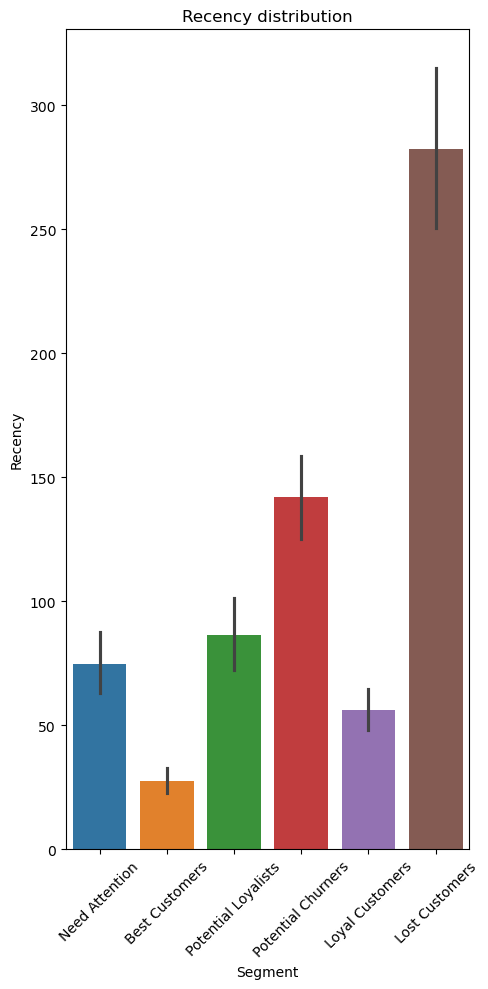

In [199]:
plt.figure(figsize=(5, 10))
sns.barplot(x='rfm_Segment',y='Recency', data=rfm, hue='rfm_Segment')
plt.title('Recency distribution')
plt.xlabel('Segment')
plt.ylabel('Recency')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

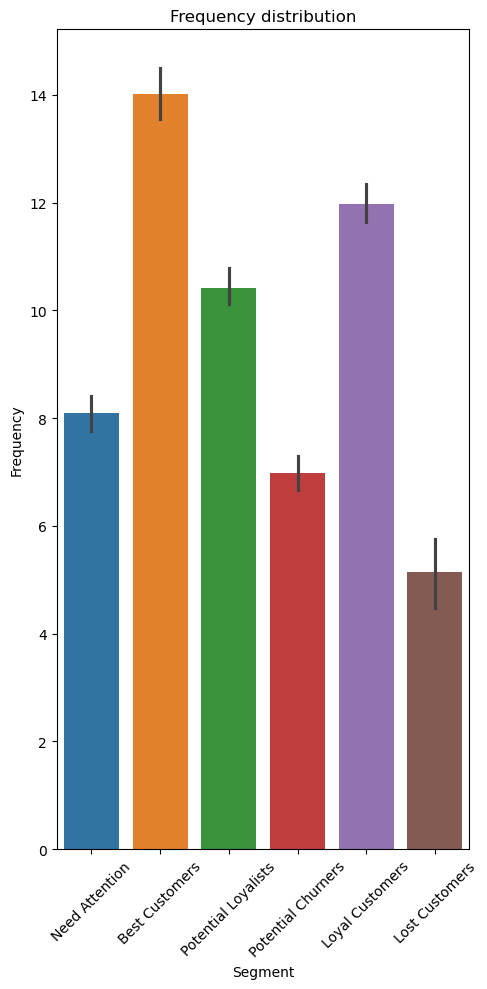

In [200]:
plt.figure(figsize=(5, 10))
sns.barplot(x='rfm_Segment',y='Frequency', data=rfm, hue='rfm_Segment')
plt.title('Frequency distribution')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

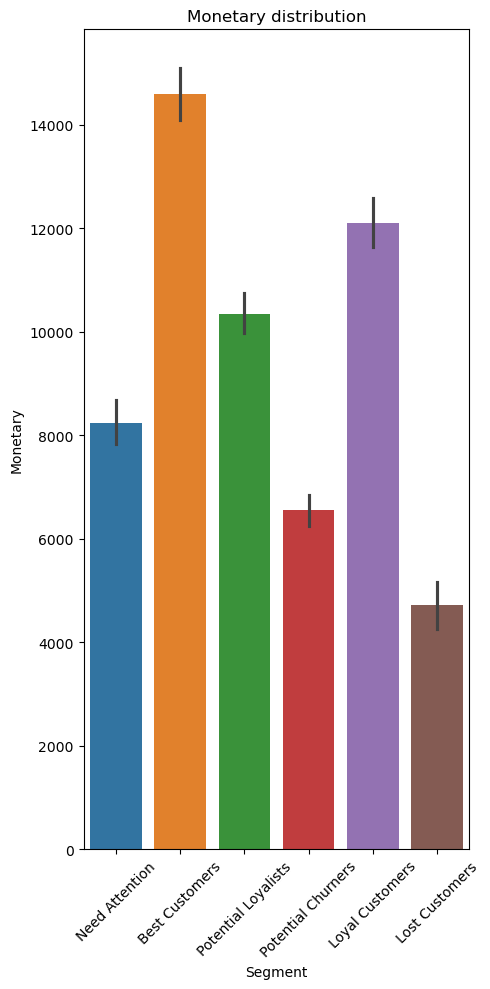

In [201]:
plt.figure(figsize=(5, 10))
sns.barplot(x='rfm_Segment',y='Monetary', data=rfm, hue='rfm_Segment')
plt.title('Monetary distribution')
plt.xlabel('Segment')
plt.ylabel('Monetary')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

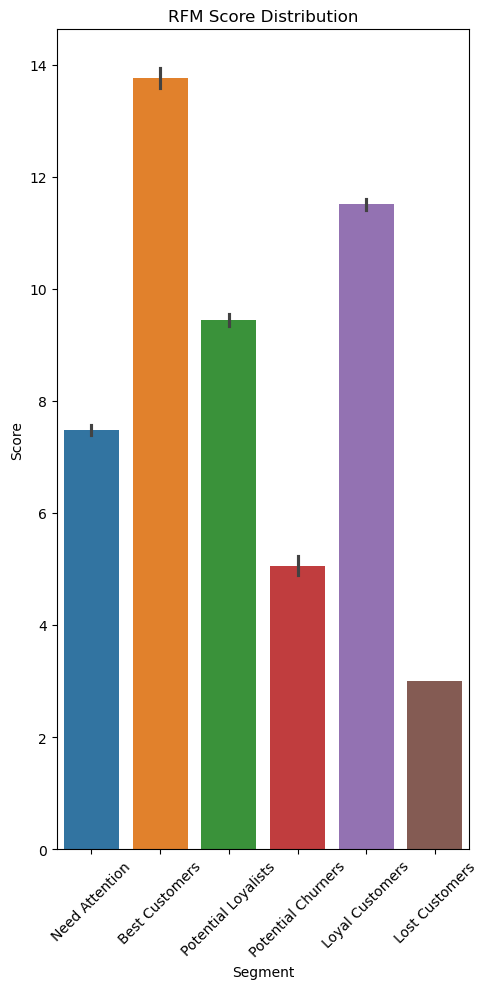

In [202]:
plt.figure(figsize=(5, 10))
sns.barplot(x='rfm_Segment',y='rfm_score', data=rfm, hue='rfm_Segment')
plt.title('RFM Score Distribution')
plt.xlabel('Segment')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()